# Driver Drowsiness Detection using Keras

This notebook walks through a complete pipeline for detecting driver drowsiness using a CNN-based image classifier in Keras, starting from a new dataset.

In [1]:
# ✅ Step 1: Import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow.keras as keras


## ✅ Step 2: Load and preprocess dataset
- Merge categories:
  - closed_eyes + yawn → drowsy (label 0)
  - open_eyes + no_yawn → alert (label 1)

In [2]:
data = []
labels = []

categories = {
    'closed_eyes': 0,
    'yawn': 0,
    'open_eyes': 1,
    'no_yawn': 1
}

IMG_SIZE = 64
dataset_path = 'dataset'  # Adjust to your actual path

for category in categories:
    folder_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(categories[category])

data = np.array(data) / 255.0
labels = np.array(labels)

## ✅ Step 3: Train-test split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

## ✅ Step 4: Build the CNN model

In [4]:
model = keras.Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 3)), 
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

## ✅ Step 5: Train the model

In [5]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5256 - loss: 0.7469 - val_accuracy: 0.7190 - val_loss: 0.6042
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7140 - loss: 0.5715 - val_accuracy: 0.7810 - val_loss: 0.4158
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7756 - loss: 0.4140 - val_accuracy: 0.8086 - val_loss: 0.3778
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7909 - loss: 0.3693 - val_accuracy: 0.8241 - val_loss: 0.3507
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7943 - loss: 0.3605 - val_accuracy: 0.8259 - val_loss: 0.3177
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8275 - loss: 0.3293 - val_accuracy: 0.8259 - val_loss: 0.3240
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8347 - loss: 0.3182 - val_accuracy: 0.8362 - val_loss: 0.3247
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8495 - loss: 0.3063 - val_accuracy: 0.8517 - v

## ✅ Step 6: Evaluate and visualize performance

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8293 - loss: 0.2933
Test Accuracy: 84.83%


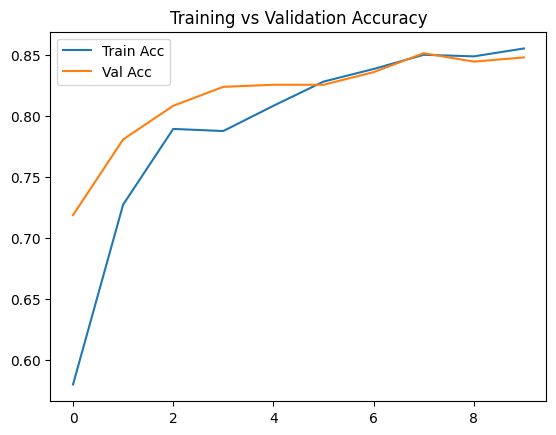

In [6]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

## ✅ Step 7: Predict on a new image

In [7]:
def predict_and_visualize_images_with_confidence(image_paths):
    plt.figure(figsize=(14, 8))

    for i, img_path in enumerate(image_paths):
        # Load and prepare the image
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img_normalized = img_resized / 255.0
        img_input = img_normalized.reshape(1, IMG_SIZE, IMG_SIZE, 3)

        # Make prediction
        prediction = model.predict(img_input)[0][0]
        confidence = prediction if prediction > 0.5 else 1 - prediction
        label = "Alert" if prediction > 0.5 else "Drowsy"

        # Plot
        plt.subplot(2, 3, i + 1)
        plt.imshow(img_rgb)
        plt.title(f"{label} ({confidence * 100:.1f}%)")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# predict_image('path_to_image.jpg')

In [8]:
test_images = [
    "dataset/closed_eyes/_146.jpg",
    "dataset/no_yawn/5.jpg",
    "dataset/open_eyes/_13.jpg",
    "dataset/yawn/16.jpg",
    "dataset/closed_eyes/_534.jpg",
    "dataset/no_yawn/1766.jpg"
]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


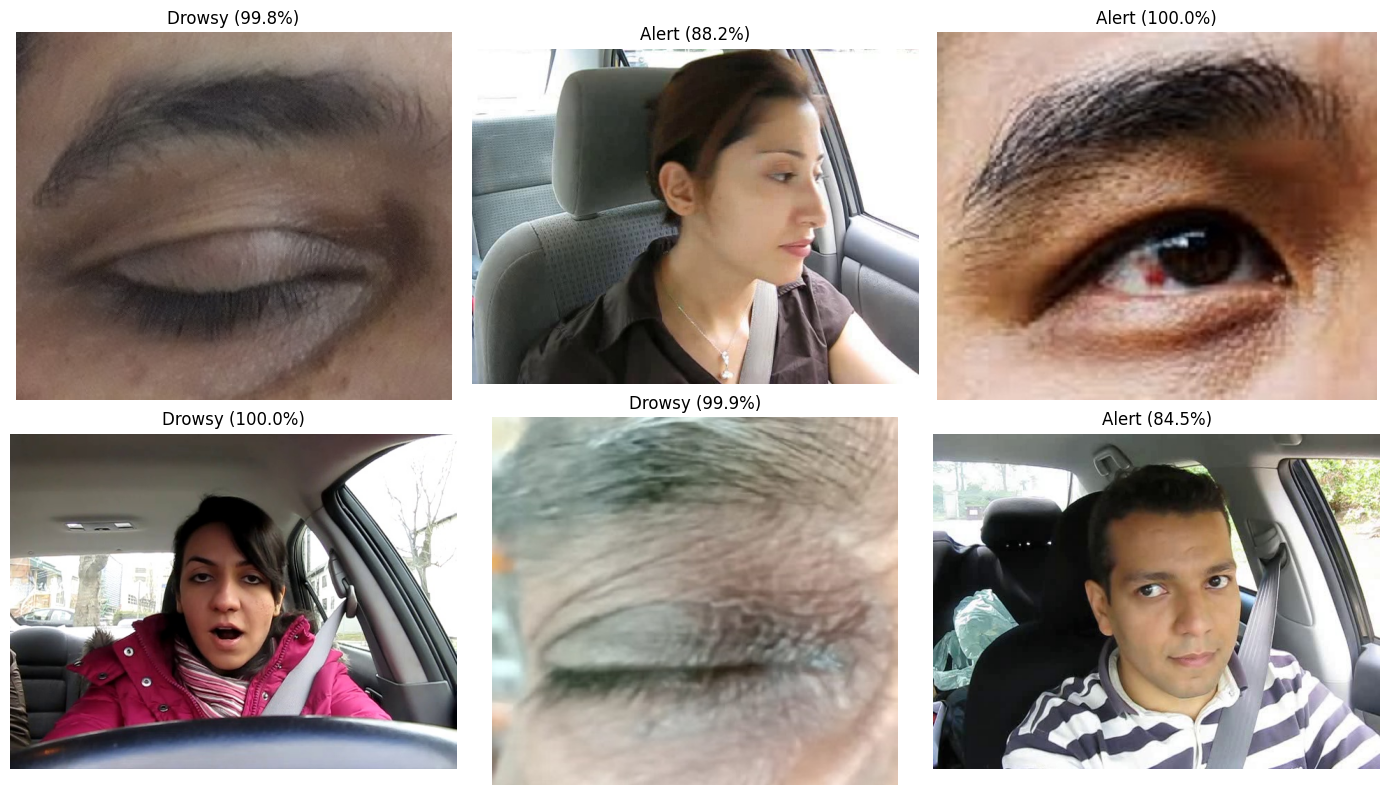

In [9]:
predict_and_visualize_images_with_confidence(test_images)